Dersom du velger å løse den ferdigdefinerte oppgaven:
Innleveringen skal inneholde kjørbar kode (en py-fil eller JNB-fil (Jupyter Notebook) hvor alle
deloppgavene besvares i en og samme fil). All kode skal dokumenteres med korte
informative kommentarer. Et viktig moment med innleveringen er at koden du leverer fra
deg er grundig testet og at den er kjørbar for mottaker.

Den ferdigdefinerte oppgaven består av 6 deloppgaver, hvor minst 5 av de 6 deloppgavene
skal besvares. 

Oppgaven Support dashboard er gitt nedenfor.
Support dashboard.
Du skal her utføre diverse analyser av data som er loggført for supportavdelingen ved
telefonselskapet MORSE. Enhver kundehenvendelse til MORSE blir loggført i en xlsx-fil og du
skal i dette prosjektet jobbe med dataloggen for uke 24. Filen ‘support_uke_24.xlsx’ finner
du sammen med prosjektoppgaven i Canvas under menyen Oppgaver -> Prosjektoppgaven,
og filen er organisert på følgende måte:
Kolonne 1: Ukedag henvendelsen fant sted
Kolonne 2: Klokkeslett kunden tok kontakt med supportavdelingen
Kolonne 3: Samtalens varighet
Kolonne 4: Kundens tilfredshet (skala fra 1-10 hvor 1 indikerer svært misfornøyd og 10
indikerer svært fornøyd).
Merk: kolonne 4 er ikke komplett da mange kunder unnlater å gi tilbakemelding på sin
tilfredshet.

Del a) Skriv et program som leser inn filen ‘support_uke_24.xlsx’ og lagrer data fra kolonne 1
i en array med variablenavn ‘u_dag’, dataen i kolonne 2 lagres i arrayen ‘kl_slett’, data i
kolonne 3 lagres i arrayen ‘varighet’ og dataen i kolonne 4 lagres i arrayen ‘score’
. Merk:
filen ‘support_uke_24.xlsx’ må ligge i samme mappe som Python-programmet ditt.

In [4]:
#eks: lese Excel-filer
import pandas as pd

data = pd.read_excel("support_uke_24.xlsx")

u_dag = data['Ukedag'].values
kl_slett = data['Klokkeslett'].values
varighet = data['Varighet'].values
score = data['Tilfredshet'].values

#  Koden for verifisering av antall linjer lest inn: print(len(u_dag))

Del b) Skriv et program som finner antall henvendelser for hver de 5 ukedagene. Resultatet
visualiseres ved bruk av et søylediagram (stolpediagram).

['Mandag' 'Tirsdag' 'Onsdag' 'Torsdag' 'Fredag']
[51 44 45 35 42]


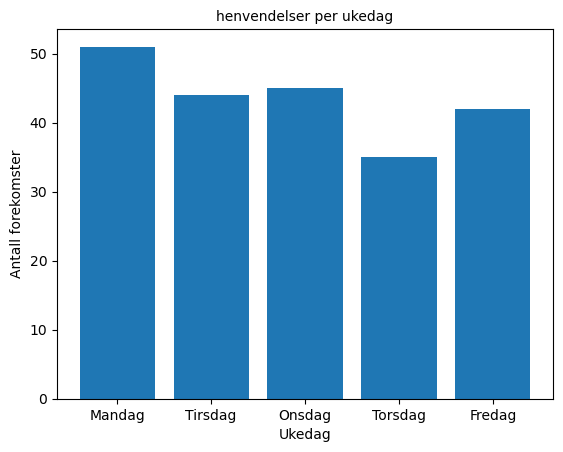

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#  %whos
#  plt.plot(year, antall)
#  plt.grid()

#Eksempler på søylediagram

unike_dager, indeks = np.unique(u_dag, return_index=True)
unike_dager = unike_dager[np.argsort(indeks)]  # Bevarer original rekkefølge

# Teller antall forekomster av hver unik dag
antall_forekomster = np.array([np.sum(u_dag == dag) for dag in unike_dager])


print(unike_dager)
print(antall_forekomster)

#  sizes = [1, 6, 5]
#  labels = ["0-3000", "3000-6000", "mer enn 6000"]

plt.bar(unike_dager, antall_forekomster)
plt.title('henvendelser per ukedag', fontsize=10)
plt.xlabel('Ukedag', fontsize=10)
plt.ylabel('Antall forekomster', fontsize=10)
plt.show()


Del c) Skriv et program som finner minste og lengste samtaletid som er loggført for uke 24.
Svaret skrives til skjerm med informativ tekst.

In [8]:
# varighet = data['Varighet'].values
# print(varighet)

max_value = varighet.max()
print("Maximum Value:", max_value)

max_indeks = varighet.argmax()
print("Maximum Value:", max_indeks, "tiden var (format tt:mm:ss) : ", varighet[max_indeks])
min_indeks = varighet.argmin()
print("Minimum Value:", min_indeks, "tiden var (format tt:mm:ss) : ", varighet[min_indeks])

Maximum Value: 00:11:28
Maximum Value: 192 tiden var (format tt:mm:ss) :  00:11:28
Minimum Value: 59 tiden var (format tt:mm:ss) :  00:00:59


Del d) KREVENDE: Skriv et program som regner ut gjennomsnittlig samtaletid basert på alle
henvendelser i uke 24.

In [10]:

# varighet = data['Varighet'].values
# print(varighet)

def konverter_tid_til_sekunder(tid):  # Konverterer en tid fra format tt:mm:ss til sekunder.
    h, m, s = tid.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

def konverter_sekunder_til_tid(sekunder):   # Konverterer sekunder til format tt:mm:ss
    h = sekunder // 3600
    m = (sekunder % 3600) // 60
    s = sekunder % 60
    return f'{int(h):02}:{int(m):02}:{int(s):02}'

# Varighet på samtaler er definert i variabelen "varighet"

# Lager en ny array med varighetene konvsertert til sekunder
varighet_sekunder = np.array([konverter_tid_til_sekunder(tid) for tid in varighet])

# Beregn gjennomsnittlig varighet i sekunder
gjennomsnitt_varighet_sekunder = np.mean(varighet_sekunder)

# Konverter gjennomsnittet tilbake til tt:mm:ss format
gjennomsnitt_varighet = konverter_sekunder_til_tid(gjennomsnitt_varighet_sekunder)

# Skriver ut gjennomsnnittlig varighet av en henvendelse 
print(f"Gjennomsnittlig tid: {gjennomsnitt_varighet}")



Gjennomsnittlig tid: 00:06:40


Del e) Supportvaktene i MORSE er delt inn i 2-timers bolker: kl 08-10, kl 10-12, kl 12-14 og kl
14-16. Skriv et program som finner det totale antall henvendelser supportavdelingen mottok
for hver av tidsrommene 08-10, 10-12, 12-14 og 14-16 for uke 24. Resultatet visualiseres ved
bruk av et sektordiagram (kakediagram).

[98, 40, 45, 34]


([<matplotlib.patches.Wedge at 0x16c46cf50>,
 [Text(-0.8265131895223304, -0.7258622097517025, 'kl 08-10'),
  Text(1.003019963006403, -0.4516092933173919, 'kl 10-12'),
  Text(0.7604246853236928, 0.794829728904476, 'kl 12-14'),
  Text(-0.4084553256146203, 1.0213541241788053, 'kl 14-16')],
 [Text(-0.45082537610308926, -0.3959248416827467, '45.2%'),
  Text(0.5471017980034925, -0.24633234180948646, '18.4%'),
  Text(0.4147771010856506, 0.4335434884933505, '20.7%'),
  Text(-0.22279381397161105, 0.5571022495520755, '15.7%')])

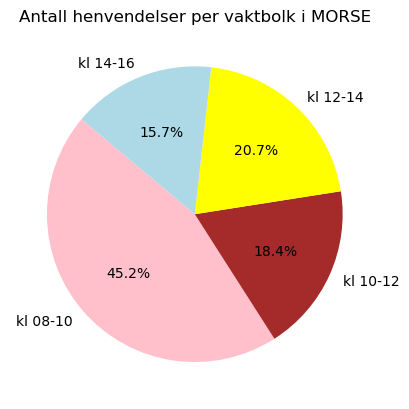

In [12]:
# Tolker oppgaven slik at vi skal presentere supportvaktene uavhengig av ukedag
# Beregner på grunnlag av starttidspunkt, og tar ikke høyde for om henvendelsen går over i neste vaktbolk

def konverter__til_start_time(start_tid):  #funksjon som gjør om fra tt:mm:ss til tt
    h, m, s = start_tid.split(':')
    return int(h)

# Alle starttidspunkter ligge i variablen "kl_slett"

# Definerer 2-timers bolkene
vakt_bolker = ["kl 08-10", "kl 10-12", "kl 12-14", "kl 14-16"]

# Lager en ny array med kun time (fra tt:mm:ss)
start_time = np.array([konverter__til_start_time(start_tid) for start_tid in kl_slett])

# Telle antall henvndelser innen de gitte bolkene (legge inn i array)
aatte_ti = np.count_nonzero( (8 <= start_time) & (start_time < 10) )
ti_tolv = np.count_nonzero( (10 <= start_time) & (start_time < 12) )
tolv_to = np.count_nonzero( (12 <= start_time) & (start_time < 14) )
to_fire = np.count_nonzero( (14 <= start_time) & (start_time < 16) )
henvendelser_per_bolk = [aatte_ti, ti_tolv, tolv_to, to_fire ]

print(henvendelser_per_bolk)

# Visualiser antall henvendelser i 2-timers bolker ved bruk av sektordiagram
colors = ['pink', 'brown', 'yellow', 'lightblue'] 
plt.title('Antall henvendelser per vaktbolk i MORSE')
plt.pie(henvendelser_per_bolk, labels=vakt_bolker, colors=colors, autopct='%1.1f%%', startangle=140 )


Del f) Kundens tilfredshet loggføres som tall fra 1-10 hvor 1 indikerer svært misfornøyd og
10 indikerer svært fornøyd. Disse tilbakemeldingene skal så overføres til NPS-systemet (Net
Promoter Score).
NPS-systemet er konstruert på følgende måte:
Score 1-6 oppfattes som at kunden er negativ (vil trolig ikke anbefale MORSE til andre).
Score 7-8 oppfattes som et nøytralt svar.
Score 9-10 oppfattes som at kunden er positiv (vil trolig anbefale MORSE til andre).
Supportavdelingens NPS beregnes som et tall, prosentandelen positive kunder minus
prosentandelen negative kunder. Ved en formel kan dette gis slik:
NPS = % positive kunder - % negative kunder
Kilde: https://www.blueprnt.com/2018/09/17/net-promoter-score/
Lag et program som regner ut supportavdelings NPS og skriver svaret til skjerm. Merk:
Kunder som ikke har gitt tilbakemelding på tilfredshet, skal utelates fra utregningene.



[ 1.  2.  3.  5.  6.  7.  8.  9. 10.]
[ 3  1  2  3  1  3  2 10 18]
43
(array([0, 1, 2, 3, 4]),)
10
23.3
(array([7, 8]),)
28
65.1
NPS:  41.8
Beregnet MPS: Positive  65.1 % - Negative  23.3 % =   41.8


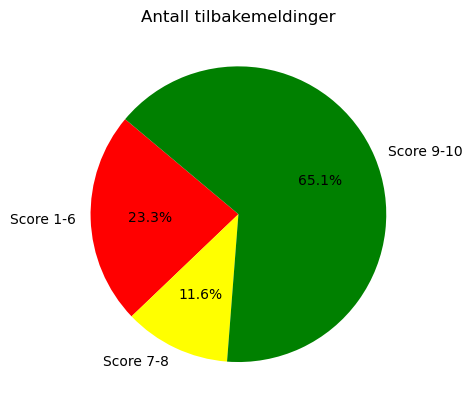

In [98]:
# Verdi på tilbakemeldinger er definert i variabelen "score"

# Henter ut alle rader som har gitt tilbakemelding. 
# rader_med_tilbakemeldinger_index = np.nonzero((1 <= score) & (score <= 10))

# Teller antall tilbakemeldinger pr score verdi fra 1 til 10
score_verdi, tilbakemeldinger_per_score = np.unique(score[~np.isnan(score)], return_counts=True)

print (score_verdi)
print (tilbakemeldinger_per_score)

# Finner totalt antall tilbakemeldinger for å kunne regne ut NPS
tilbakemeldinger_totalt = antall.sum()
print(tilbakemeldinger_totalt)

# Finne antall negative tilbakemeldinger (score 1-6), som prosent av alle tilbakemeldinger
negative_indeks = np.nonzero((1 <= score_verdi) & (score_verdi <= 6))
print(negative_indeks)

negative = tilbakemeldinger_per_score[negative_indeks].sum()
print(negative)
prosent_negative = round(negative / tilbakemeldinger_totalt * 100,1)
print(prosent_negative)

# Finne antall positive tilbakemeldinger(score 9-10), som prosent av alle tilbakemeldinger
positive_indeks = np.nonzero((9 <= score_verdi) & (score_verdi <= 10))
print(positive_indeks)

positive = tilbakemeldinger_per_score[positive_indeks].sum()
print(positive)

prosent_positive = round(positive / tilbakemeldinger_totalt * 100,1)
print(prosent_positive)

# Beregne NPS = % positive kunder - % negative kunder
verdi_NPS = prosent_positive - prosent_negative
print("NPS: ", verdi_NPS)

# Skriv ut NPS verdi til skjerm (med forklaring)
# Visualiser antall henvendelser i 2-timers bolker ved bruk av sektordiagram
colors = ['red', 'yellow', 'green'] 
plt.title('Antall tilbakemeldinger')
score_grupper = ["Score 1-6", "Score 7-8", "Score 9-10"]
tilbakemelding_scoregruppe = [negative, tilbakemeldinger_totalt - negative - positive, positive ]

plt.pie(tilbakemelding_scoregruppe, labels=score_grupper, colors=colors, autopct='%1.1f%%', startangle=140 )


print("Beregnet MPS: Positive ", prosent_positive, 
      "% - Negative ", prosent_negative, "% =  ", verdi_NPS )